In [86]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from credentials import Credentials as cr
import matplotlib as plt
import os
from split import Splitter

splitter = Splitter()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Création et import du jeu de données principal

In [87]:
valeurs2019 = pd.read_csv(cr.PATH+'2019.txt', sep='|', usecols=['Nature mutation', 'Code postal','Nombre pieces principales', 'Surface terrain', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot', 'Valeur fonciere', 'Type local', 'Nombre de lots'], encoding='utf-8')

valeurs2019 = valeurs2019.dropna(subset = ['Type local', 'Nombre de lots', 'Nombre pieces principales', "Nature mutation"])

valeurs2019['Surface terrain'][valeurs2019['Type local'].str.contains("Appartement", regex=True)] = valeurs2019['Surface terrain'][valeurs2019['Type local'].str.contains("Appartement", regex=True)].fillna(0) 

valeurs2019 = valeurs2019[['Code postal', 'Nombre pieces principales', 'Surface terrain', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot', 'Valeur fonciere']][valeurs2019['Type local'].str.contains("Appartement|Maison", regex=True)][valeurs2019['Nature mutation'].str.contains("Vente", regex=True)][valeurs2019['Nombre de lots']<6][valeurs2019['Nombre pieces principales']>0]

valeurs2019.to_csv(cr.CURATED_LOCAL_PATH + 'filtered2019.csv', index=False)

valeurs2019.head()

,Code postal,Nombre pieces principales,Surface terrain,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Valeur fonciere
0,1000.0,1.0,0.0,"19,27",NaN,NaN,NaN,NaN,"37220,00"
1,1000.0,3.0,0.0,NaN,"61,51",NaN,NaN,NaN,"185100,00"
3,1160.0,4.0,940.0,NaN,NaN,NaN,NaN,NaN,"209000,00"
4,1370.0,5.0,490.0,NaN,NaN,NaN,NaN,NaN,"134900,00"
5,1340.0,4.0,708.0,NaN,NaN,NaN,NaN,NaN,"192000,00"


In [88]:
# Vérification du ratio de valeurs nulles en vue de nettoyer les données.
nancount = valeurs2019["Surface terrain"].isna()
print(nancount.sum(), ' valeurs nulles / ', valeurs2019["Surface terrain"].count(), ' valeurs totales.')


21884  valeurs nulles /  917301  valeurs totales.


In [89]:
nancount = valeurs2019["Valeur fonciere"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Valeur Foncière\'.")
valeurs2019 = valeurs2019.dropna(subset = ['Valeur fonciere'])

nancount = valeurs2019["Valeur fonciere"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Valeur Foncière\'.")

nancount = valeurs2019["Code postal"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Code postal\' sur un total de ", valeurs2019["Surface terrain"].count(), "valeurs.")
valeurs2019 = valeurs2019.dropna(subset = ['Code postal'])

nancount = valeurs2019["Code postal"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Code postal\' sur un total de ", valeurs2019["Surface terrain"].count(), "valeurs.")

Il y a  3615  valeurs nulles dans la colonne &#39;Valeur Foncière&#39;.
Il y a  0  valeurs nulles dans la colonne &#39;Valeur Foncière&#39;.
Il y a  54  valeurs nulles dans la colonne &#39;Code postal&#39; sur un total de  913717 valeurs.
Il y a  0  valeurs nulles dans la colonne &#39;Code postal&#39; sur un total de  913663 valeurs.


In [90]:
valeurs2019.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 935516 entries, 0 to 2535790
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Code postal                 935516 non-null  float64
 1   Nombre pieces principales   935516 non-null  float64
 2   Surface terrain             913663 non-null  float64
 3   Surface Carrez du 1er lot   187593 non-null  object 
 4   Surface Carrez du 2eme lot  50988 non-null   object 
 5   Surface Carrez du 3eme lot  4175 non-null    object 
 6   Surface Carrez du 4eme lot  842 non-null     object 
 7   Surface Carrez du 5eme lot  207 non-null     object 
 8   Valeur fonciere             935516 non-null  object 
dtypes: float64(3), object(6)
memory usage: 71.4+ MB


In [91]:
valeurs2019[['Valeur fonciere', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']] = valeurs2019[['Valeur fonciere', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']].replace(',', '.', regex=True)

valeurs2019[['Valeur fonciere', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']]  = valeurs2019[['Valeur fonciere', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']].astype('float')

In [92]:
ventes.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 2280210 entries, 0 to 2308538
Data columns (total 10 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Nature mutation             object 
 1   Valeur fonciere             float64
 2   Code postal                 float64
 3   Surface Carrez du 1er lot   float64
 4   Surface Carrez du 2eme lot  float64
 5   Surface Carrez du 3eme lot  float64
 6   Surface Carrez du 4eme lot  float64
 7   Surface Carrez du 5eme lot  float64
 8   Nombre pieces principales   float64
 9   Surface terrain             float64
dtypes: float64(9), object(1)
memory usage: 191.4+ MB


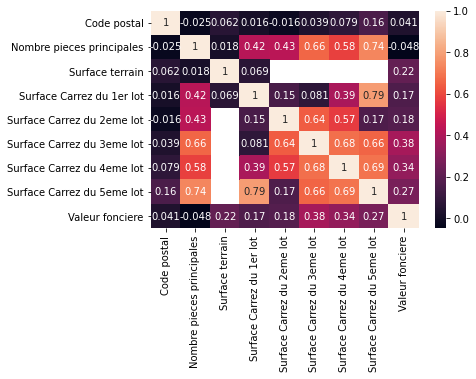

In [93]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = valeurs2019.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [96]:
nancount = valeurs2019["Surface terrain"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Surface Terrain\'.")
valeurs2019 = valeurs2019.dropna(subset = ['Surface terrain'])

nancount = valeurs2019["Surface terrain"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Surface Terrain\'.")

Il y a  21853  valeurs nulles dans la colonne &#39;Surface Terrain&#39;.
Il y a  0  valeurs nulles dans la colonne &#39;Surface Terrain&#39;.


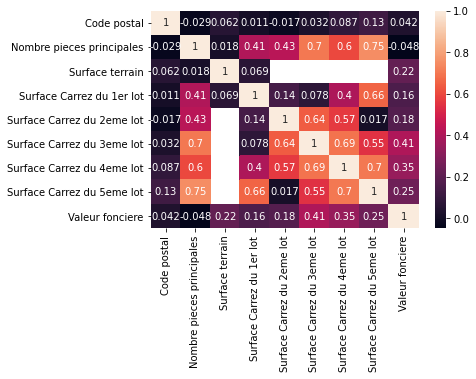

In [97]:
corrMatrix = valeurs2019.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()